In [1]:
# plot maps
from mpl_toolkits.basemap import Basemap,  maskoceans # cm, 
from matplotlib import colors
from pylab import *
import matplotlib.cm as cm

import pandas as pd
import os
%matplotlib inline

In [2]:
os.getenv('PATH')

'/home/share/unix_files/anaconda/v2.1/bin:/usr/local/install/cdo-1.6.3/bin:/usr/local/install/netcdf-4.3.2/bin:/usr/lib64/qt-3.3/bin:/home/users/nhempel/bin:/usr/local/install/intel-fcomp-2013/composer_xe_2013.2.146/bin/intel64:/usr/local/install/intel-fcomp-2013/composer_xe_2013.2.146/mpirt/bin/intel64:/usr/local/install/intel-fcomp-2013/composer_xe_2013.2.146/bin/intel64:/usr/local/install/intel-fcomp-2013/composer_xe_2013.2.146/bin/intel64_mic:/usr/local/install/intel-fcomp-2013/composer_xe_2013.2.146/debugger/gui/intel64:/usr/local/bin:/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/sbin'

In [3]:
# set up workspace

if 'obelix' in os.uname()[1] or 'asterix' in os.uname()[1]:
    env = '/home/estimr2/nhempelmann'
else: 
    env = os.getenv('HOME')

In [4]:
# get required data

ukstpath = os.path.join(env+'/data/euclia/uk/SouthUKrainSTATIONS.txt')
frstpath = os.path.join(env+'/data/euclia/station_coords.csv')

# french stations:
frst = pd.read_csv(frstpath,
                   sep=',',
                   #names = ['NUM_POSTE','lat','lon']
                   usecols=[0,8,9],
                 #  skiprows = 1
                   )
# UK stations: 
uklon = np.array([-1.2625,-0.3586, -0.4748,-0.6750,0.1310,0.2850,-0.4500,0.4610,-0.1780,-0.3780,-1.8040,-1.3340,-1.1790,-0.5950])
uklat = np.array([51.7607, 51.8062, 51.3103, 50.7810, 52.1930, 50.7620, 51.2870, 51.0760, 51.5600, 51.4120, 51.2010, 51.0080, 50.6230, 52.0140])
NUM_POSTE = np.array(['Oxford_606','Rothamsted_471','Wisley_719','BognorRegis_782','CambridgeBG_454','Eastbourne_808','EastMalling_744','Goodhurst_742','Hampstead_695','HamptonWWks_711','Larkhill_888','OtterbourneWWks_855','WightShanklin_878','Woburn_458'])
# add the french station 
lon = np.append(uklon, frst.lon.div(10000).values)
lat = np.append(uklat, frst.lat.div(10000).values)
NUM_POSTE = np.append(NUM_POSTE, frst.NUM_POSTE.values)

In [5]:
# get the data 

rr = pd.read_csv(os.path.join(env+'/data/euclia/allstations.csv'),
#                names = ['Oxford_606','Rothamsted_471','Wisley_719','BognorRegis_782','CambridgeBG_454','Eastbourne_808','EastMalling_744','Goodhurst_742','Hampstead_695','Larkhill_888','OtterbourneWWks_855','WightShanklin_878','Woburn_458'],
                 # usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],
                 parse_dates = [0],
                 sep=',',
                 keep_date_col = True,
                 # na_values=-999,
                 index_col =[0])

In [6]:
# generate the winter season values 

DJF = (rr[np.any([rr.index.month == 12, rr.index.month == 1, rr.index.month == 2], axis=0 )]).resample('M', how='sum')#.tshift(-1, freq='M')
wsum = DJF.resample('A', how='sum',  fill_method=None, closed={'right'}, convention = 'start',  kind=None, loffset=None, limit=None, base=0)

In [7]:
#wsum

In [8]:
# rank the vaulues 
DJF55r = wsum[wsum.index.year >= 1955].rank(axis = 0, ascending=False ) # method='average', na_option='keep', ascending=False, pct=False)
# get the 2014 record value
w14 = DJF55r[DJF55r.index.year == 2014]

In [9]:
# sort appropriate to NUM_POSTE
z = np.zeros(len(w14.columns.values))
for name in w14.columns.values: 
    i = np.where(NUM_POSTE == name.replace('ID',''))
    # print i[0][0]
    z[i[0][0]] = w14[name].values

In [10]:
z

array([  1. ,   1. ,   1. ,   1. ,   6. ,   1. ,   1. ,   1. ,   1. ,
         1. ,   1. ,   1. ,   1. ,   2. ,  24. ,   2. ,  17. ,   2. ,
         2. ,  16.5,  20. ,  22. ,   2. ,   1. ,   1. ,   1. ,  18. ,
         1. ,   2. ,   3. ,   4. ,  13. ,   5. ,   1. ,   1. ,   2. ,
         1. ,   1. ,   2. ,   1. ,   1. ,   2. ,   7. ,   6. ,   5. ])

<matplotlib.colorbar.Colorbar instance at 0x2b64f180e368>

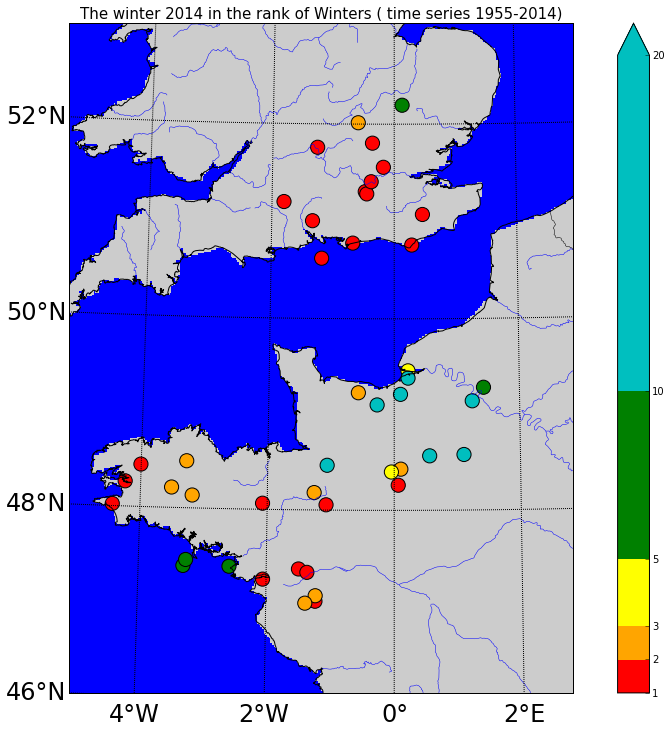

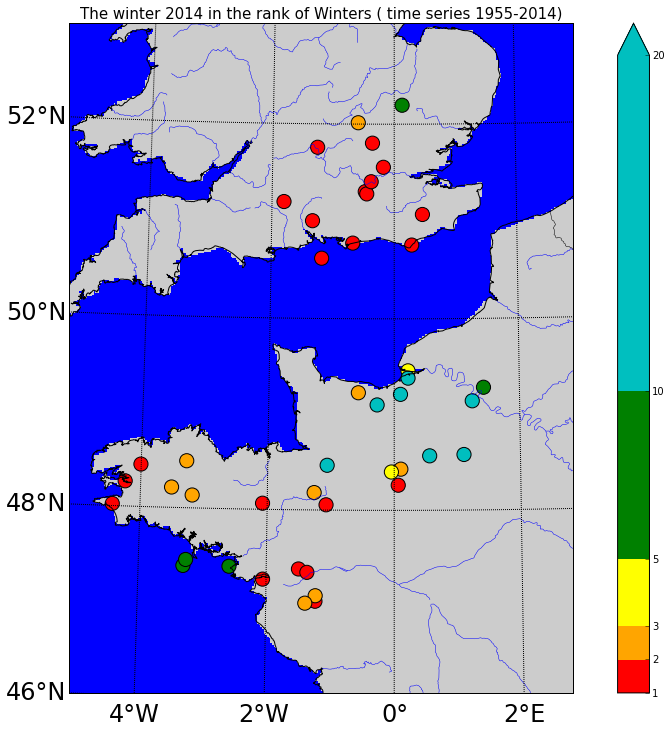

In [11]:
# prepare basemap
fig = plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

lat0=0
lon0=0
lllon=-5 #min(LON)
lllat=46 #min(LAT)
urlon=3  #max(LON)
urlat=53 #max(LON)
m = Basemap(projection='stere',lat_0=lat0,lon_0=lon0,
                        llcrnrlon=lllon,llcrnrlat=lllat,
                        urcrnrlon=urlon,urcrnrlat=urlat,
            resolution='h',area_thresh=1000.)
             
# draw coastlines, state and country boundaries, edge of map.
m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.drawrivers(linewidth=0.5, linestyle='solid', color='b', antialiased=1, ax=None, zorder=None)
m.drawlsmask(land_color='0.8', ocean_color='b', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, resolution='l', grid=1.25)

m.drawparallels(np.arange(30.,70.,2.), labels = [1, 0, 0, 0],fontsize=24)
m.drawmeridians(np.arange(-10.,50.,2.), labels = [0, 0, 0, 1],fontsize=24)

cmap = mpl.colors.ListedColormap(['red', 'orange', 'yellow', 'green', 'c' ])
#cmap.set_over('0.25')
#cmap.set_under('0.75')

# If a ListedColormap is used, the length of the bounds array must be
# one greater than the length of the color list.  The bounds must be
# monotonically increasing.
bounds = [1, 2, 3, 5, 10, 20]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# cm = matplotlib.cm.get_cmap('RdYlBu')
# cmap = plt.cm.get_cmap('Set1')

ax1 = fig.add_subplot(111)
x, y = m(lon, lat)
ax1 = m.scatter(x,y, marker='o', c=z, cmap=cmap, norm=norm,  s=200 )
plt.title('The winter 2014 in the rank of Winters ( time series 1955-2014)', fontsize=15 )
plt.colorbar(ax1, ticks=bounds, spacing='proportional', extend='max')
fig = plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

lat0=0
lon0=0
lllon=-5 #min(LON)
lllat=46 #min(LAT)
urlon=3  #max(LON)
urlat=53 #max(LON)
m = Basemap(projection='stere',lat_0=lat0,lon_0=lon0,
                        llcrnrlon=lllon,llcrnrlat=lllat,
                        urcrnrlon=urlon,urcrnrlat=urlat,
            resolution='h',area_thresh=1000.)
             
# draw coastlines, state and country boundaries, edge of map.
m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.drawrivers(linewidth=0.5, linestyle='solid', color='b', antialiased=1, ax=None, zorder=None)
m.drawlsmask(land_color='0.8', ocean_color='b', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, resolution='l', grid=1.25)

m.drawparallels(np.arange(30.,70.,2.), labels = [1, 0, 0, 0],fontsize=24)
m.drawmeridians(np.arange(-10.,50.,2.), labels = [0, 0, 0, 1],fontsize=24)

cmap = mpl.colors.ListedColormap(['red', 'orange', 'yellow', 'green', 'c' ])
#cmap.set_over('0.25')
#cmap.set_under('0.75')

# If a ListedColormap is used, the length of the bounds array must be
# one greater than the length of the color list.  The bounds must be
# monotonically increasing.
bounds = [1, 2, 3, 5, 10, 20]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# cm = matplotlib.cm.get_cmap('RdYlBu')
# cmap = plt.cm.get_cmap('Set1')

ax1 = fig.add_subplot(111)
x, y = m(lon, lat)
ax1 = m.scatter(x,y, marker='o', c=z, cmap=cmap, norm=norm,  s=200 )
plt.title('The winter 2014 in the rank of Winters ( time series 1955-2014)', fontsize=15 )
plt.colorbar(ax1, ticks=bounds, spacing='proportional', extend='max')
# plt.show()# plt.show()

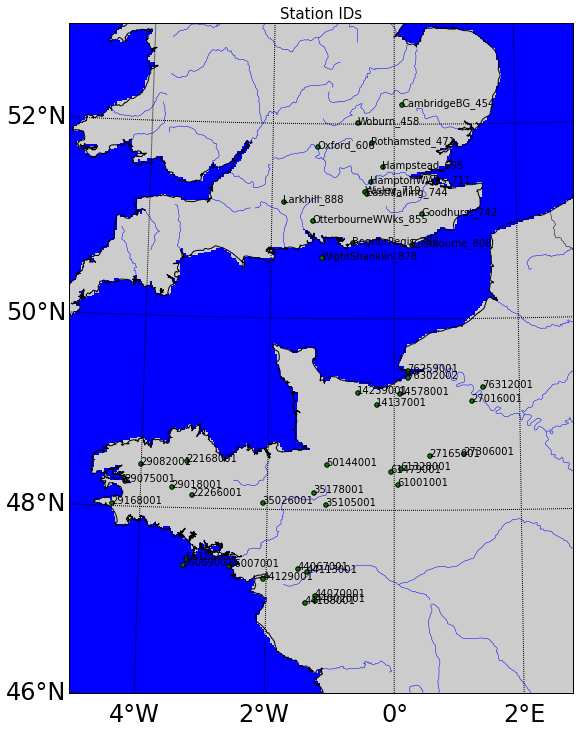

In [12]:
fig = plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

lat0=0
lon0=0
lllon=-5 #min(LON)
lllat=46 #min(LAT)
urlon=3  #max(LON)
urlat=53 #max(LON)
m = Basemap(projection='stere',lat_0=lat0,lon_0=lon0,
                        llcrnrlon=lllon,llcrnrlat=lllat,
                        urcrnrlon=urlon,urcrnrlat=urlat,
            resolution='h',area_thresh=1000.)
             
# draw coastlines, state and country boundaries, edge of map.
m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.drawrivers(linewidth=0.5, linestyle='solid', color='b', antialiased=1, ax=None, zorder=None)
m.drawlsmask(land_color='0.8', ocean_color='b', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, resolution='l', grid=1.25)

m.drawparallels(np.arange(30.,70.,2.), labels = [1, 0, 0, 0],fontsize=24)
m.drawmeridians(np.arange(-10.,50.,2.), labels = [0, 0, 0, 1],fontsize=24)

# cmap = mpl.colors.ListedColormap(['red', 'orange', 'yellow', 'green', 'c' ])
# cmap.set_over('0.25')
# cmap.set_under('0.75')

# If a ListedColormap is used, the length of the bounds array must be
# one greater than the length of the color list.  The bounds must be
# monotonically increasing.
#bounds = [1, 2, 3, 5, 10, 20]
#norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# cm = matplotlib.cm.get_cmap('RdYlBu')
# cmap = plt.cm.get_cmap('Set1')

ax1 = fig.add_subplot(111)
x, y = m(lon, lat)

ax1 = fig.add_subplot(111)
x, y = m(lon, lat)

ax1 = m.scatter(x,y, marker='o', c='g', s=20, label='Stations')

plt.title('Station IDs', fontsize=15 )

for label, xpt, ypt in zip(NUM_POSTE, x, y):
    plt.text(xpt, ypt, label)

SyntaxError: invalid syntax (<ipython-input-13-368395d00ef6>, line 1)